In [140]:
# for loading/processing the images  
from keras.preprocessing.image import load_img 
from keras.preprocessing.image import img_to_array 
from keras.applications.vgg16 import preprocess_input 

# models 
from keras.applications.vgg16 import VGG16 
from keras.models import Model

# clustering and dimension reduction
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# for everything else
import os
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pandas as pd
import pickle

In [141]:
path = "/Users/hsilva/Documents/Code/pocketcloset/Backend/tmp/PlWxnM6UyBOU4SyXR2yCF37VNyr2"
# change the working directory to the path where the images are located
os.chdir(path)

# this list holds all the image filename
clothes = []

# creates a ScandirIterator aliased as files
with os.scandir(path) as files:
  # loops through each file in the directory
    for file in files:
        if file.name.endswith('.jpg'):
          # adds only the image files to the flowers list
            clothes.append(file.name)

In [142]:
clothes

['71M3Jar1AfS._SY500_.jpg',
 '61ou0LnfqxL._AC_SX679_.jpg',
 '81n7lCHy2VL._AC_SX679_.jpg',
 '71zcC7OnSNL._AC_SX679_.jpg',
 '61poqVVmjLL._AC_SX679_.jpg',
 '91uHD7rTghL._AC_SX679_.jpg',
 '81zO+VyKP3S._AC_SX679_.jpg',
 '617MKoz5MOL._AC_SX679_.jpg',
 '713Rm3fs2QL._AC_SX679_.jpg',
 '91-epdw2vhL._AC_SX679_.jpg',
 '911H-B5QkcL._AC_SY741_.jpg',
 '619y1JheCZL._AC_SX679_.jpg',
 '41EfIng699L._AC_SX679_.jpg',
 'playera.jpg',
 '71aWNrNjOYL._AC_SX679_.jpg',
 '550x726.jpg',
 '51cR3PP5MQS._AC_SX679_.jpg',
 '61Ba7ZnbwdL._AC_SX679_.jpg',
 '91nKZ2ZSkEL._AC_SY606_.jpg',
 'resizedcrop-716a28857e0c6ac0c1b912537d5cb0c4-840x480.jpg',
 '61tKSMFaWKL._AC_SX569_.jpg',
 '81JqT1pLnhL._AC_SX679_.jpg',
 '81YyKtIShDL._AC_SX679_.jpg',
 '71WoPu3tYkL._AC_SX679_.jpg',
 '71mmU02R43S._SY500_.jpg',
 '61UgGF0dibL._AC_SX679_.jpg',
 '91cyr1mpEOL._AC_SX679_.jpg',
 '71YxuT6wwUS._AC_SX679_.jpg']

In [143]:
# load the image as a 224x224 array
img = load_img(clothes[0], target_size=(224,224))
# convert from 'PIL.Image.Image' to numpy array
img = np.array(img)

print(img.shape)
(224, 224, 3)

(224, 224, 3)


(224, 224, 3)

In [144]:
reshaped_img = img.reshape(1,224,224,3)
print(reshaped_img.shape)
(1, 224, 224, 3)

(1, 224, 224, 3)


(1, 224, 224, 3)

In [145]:
x = preprocess_input(reshaped_img)


In [146]:
# load the model first and pass as an argument
model = VGG16()
model = Model(inputs = model.inputs, outputs = model.layers[-2].output)

def extract_features(file, model):
    # load the image as a 224x224 array
    img = load_img(file, target_size=(224,224))
    # convert from 'PIL.Image.Image' to numpy array
    img = np.array(img) 
    # reshape the data for the model reshape(num_of_samples, dim 1, dim 2, channels)
    reshaped_img = img.reshape(1,224,224,3) 
    # prepare image for model
    imgx = preprocess_input(reshaped_img)
    # get the feature vector
    features = model.predict(imgx, use_multiprocessing=True)
    return features

In [147]:
data = {}

# loop through each image in the dataset
for cloth in clothes:
    # try to extract the features and update the dictionary
    try:
        feat = extract_features(cloth,model)
        data[cloth] = feat
    # if something fails, save the extracted features as a pickle file (optional)
    except:
        with open(p,'wb') as file:
            pickle.dump(data,file)
          
 
#get a list of the filenames
filenames = np.array(list(data.keys()))

# get a list of just the features
feat = np.array(list(data.values()))
feat.shape
(210, 1, 4096)

# reshape so that there are 210 samples of 4096 vectors
feat = feat.reshape(-1,4096)
feat.shape
(210, 4096)


(210, 4096)

In [148]:
pca = PCA(n_components=.80, random_state=22)
pca.fit(feat)
x = pca.transform(feat)

In [149]:
sse = []
list_k = list(range(2, 28))

for k in list_k:
    km = KMeans(n_clusters=k, random_state=22, n_jobs=-1)
    km.fit(x)
    
    sse.append(km.inertia_)

/Users/hsilva/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/hsilva/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/hsilva/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/Users/hsilva/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was 

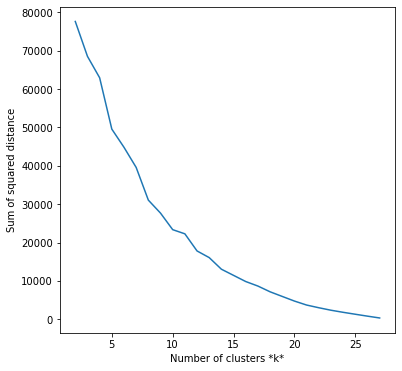

In [150]:
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse)
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [151]:
res = dict(zip(sse,list_k))
k_value = res[max(sse)]
print('valor K: ', k_value)

valor K:  2


In [155]:
clusters = KMeans(3, random_state=40)
clusters.fit(x)

KMeans(n_clusters=3, random_state=40)

In [156]:
groups = {}
for file, cluster in zip(filenames,clusters.labels_):
    if cluster not in groups.keys():
        groups[cluster] = []
        groups[cluster].append(file)
    else:
        groups[cluster].append(file)

1


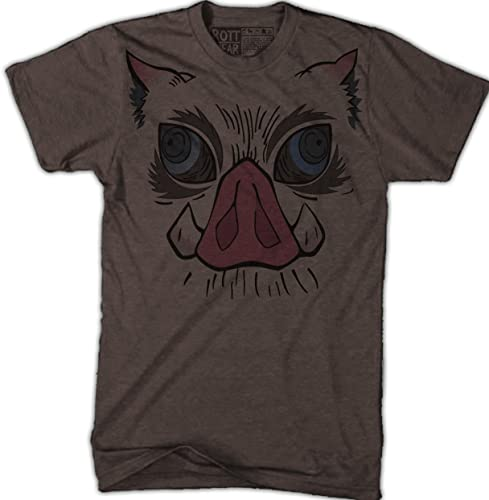

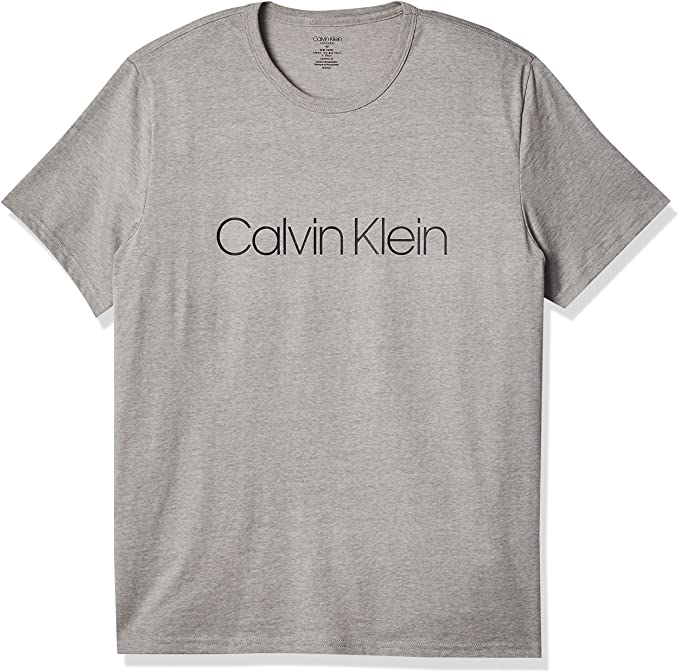

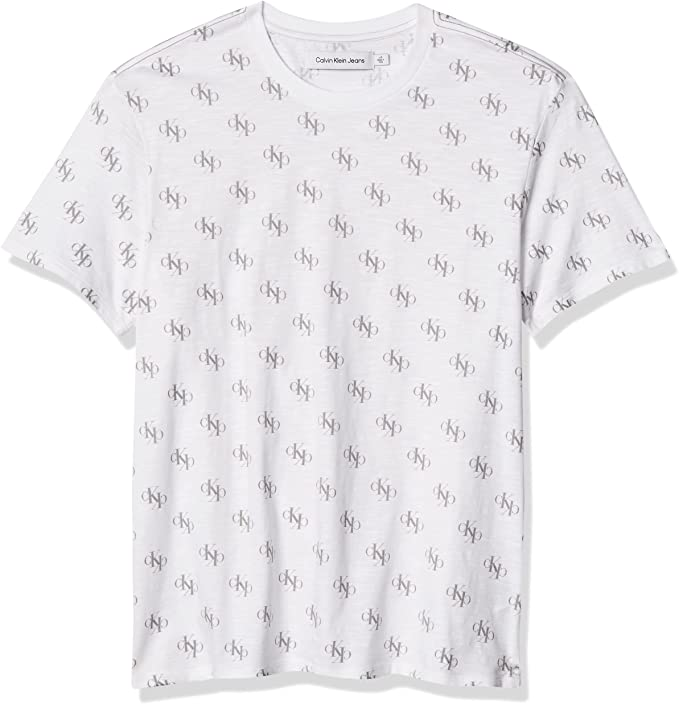

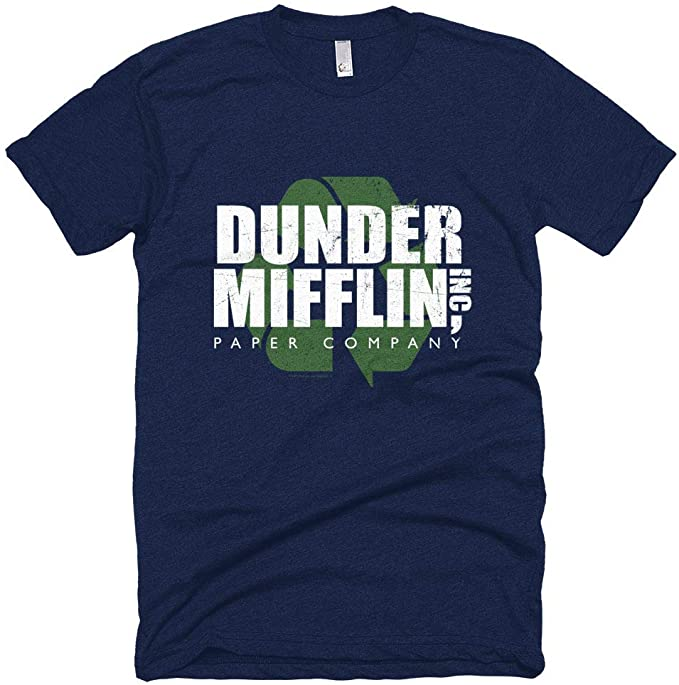

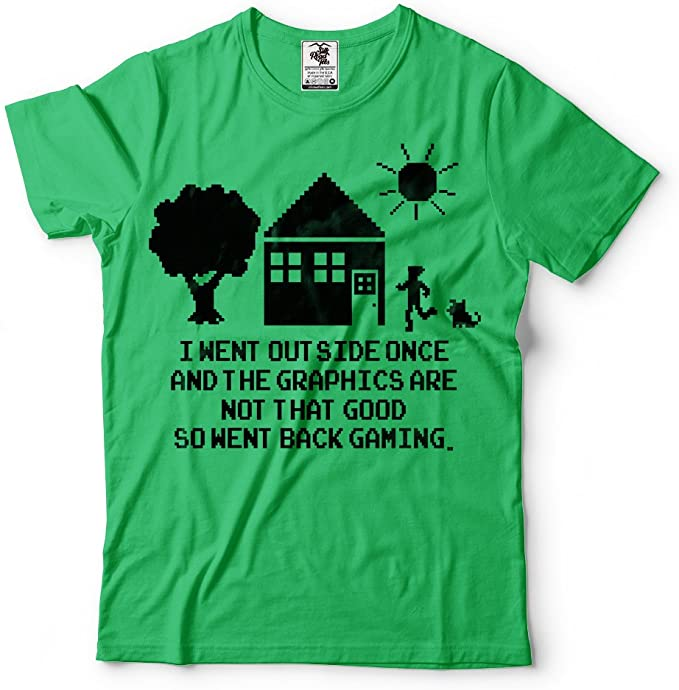

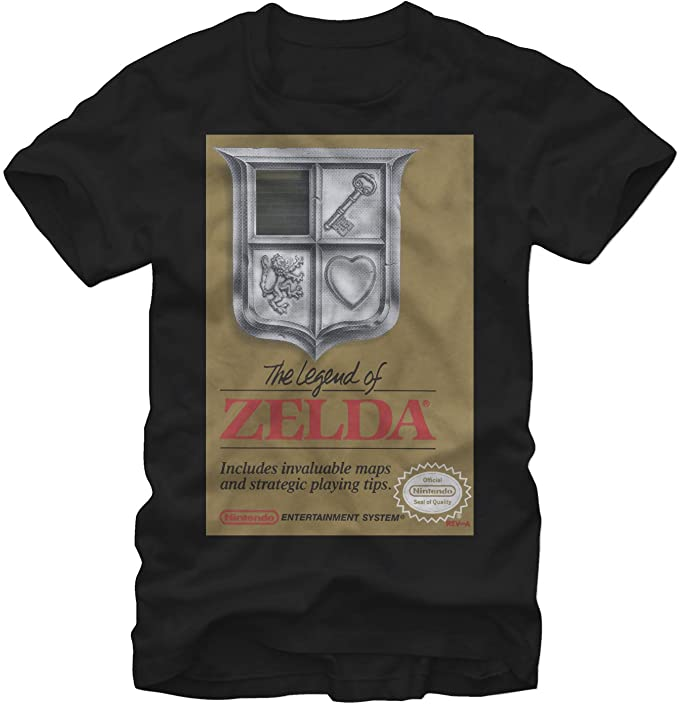

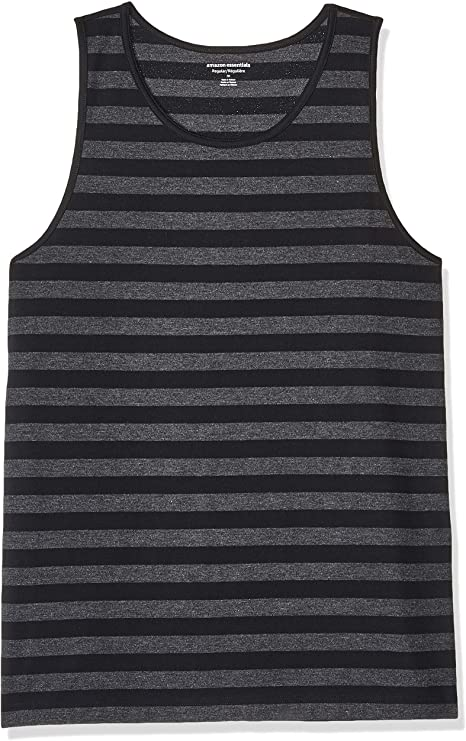

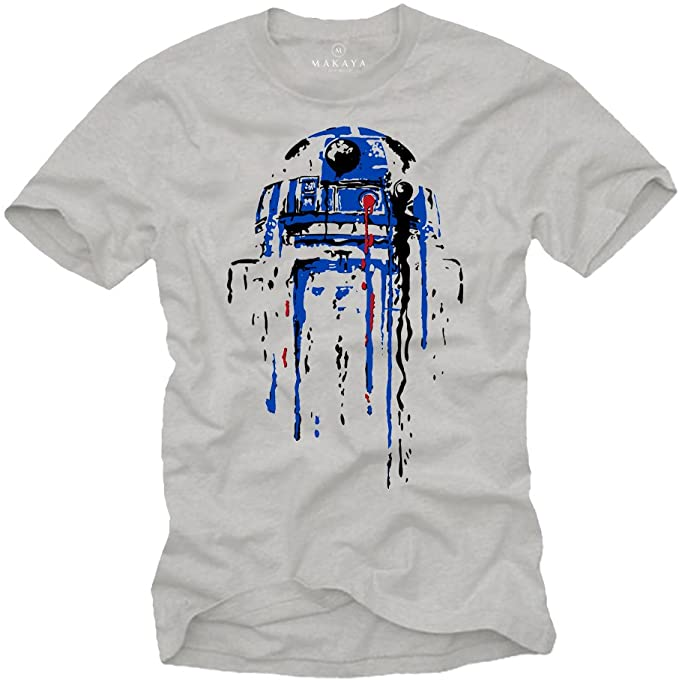

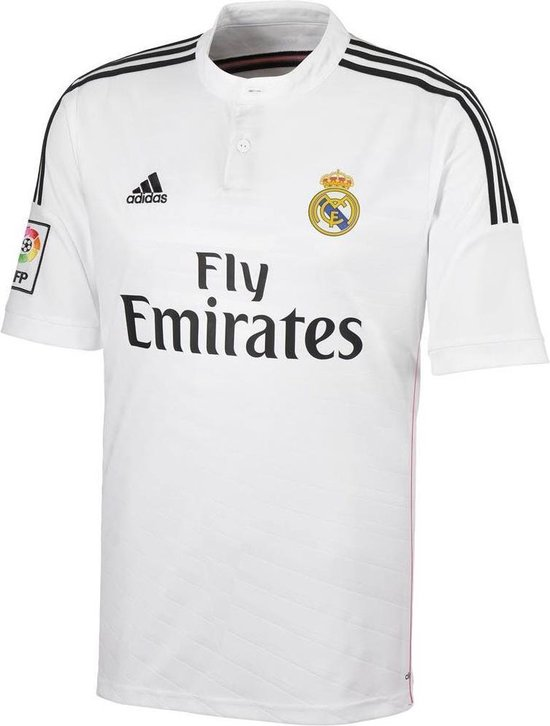

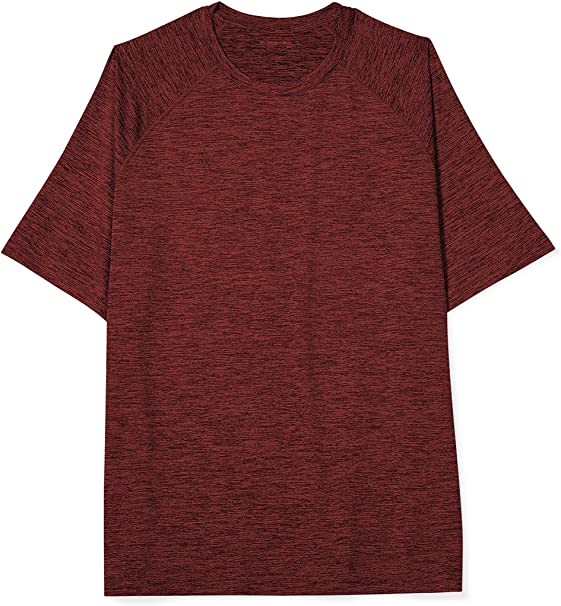

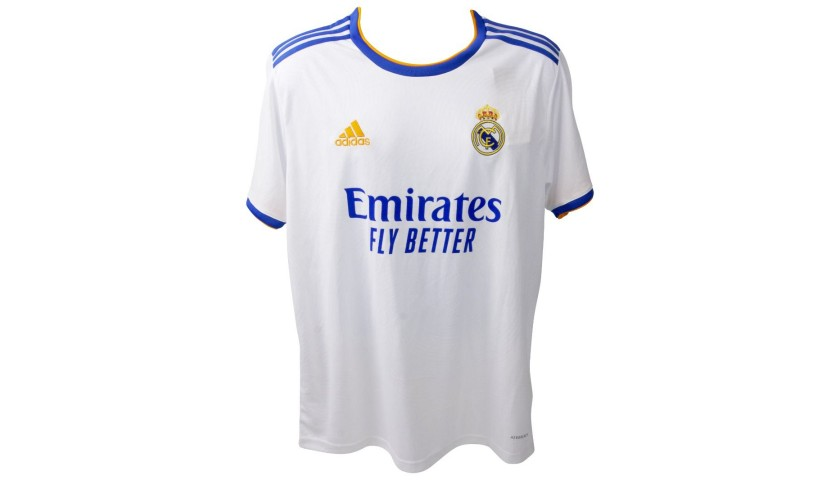

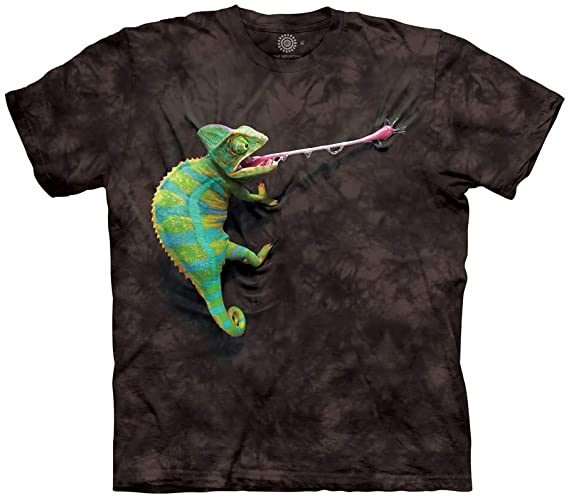

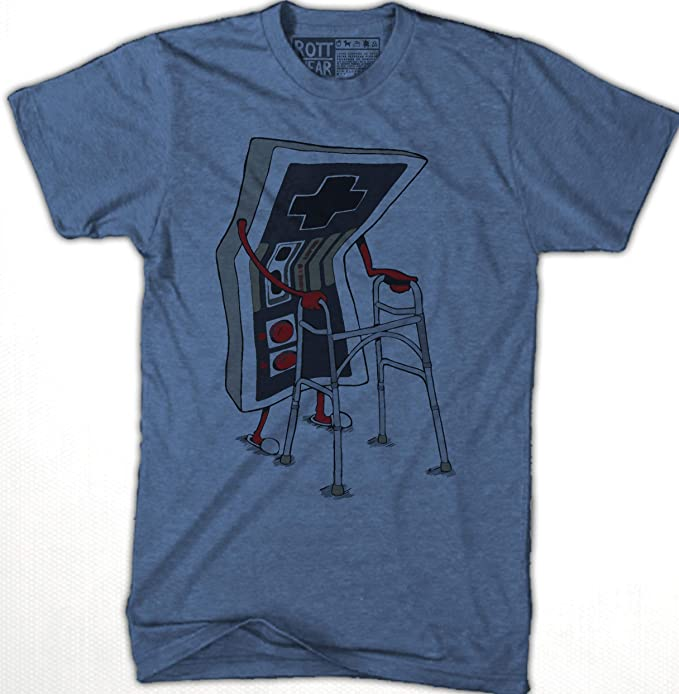

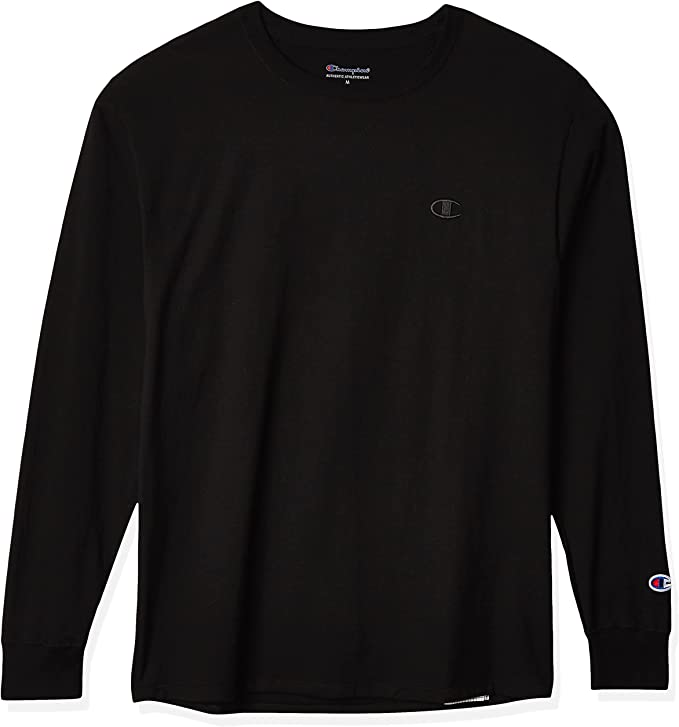

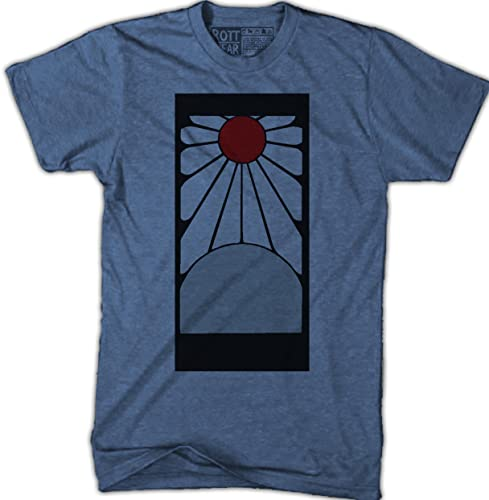

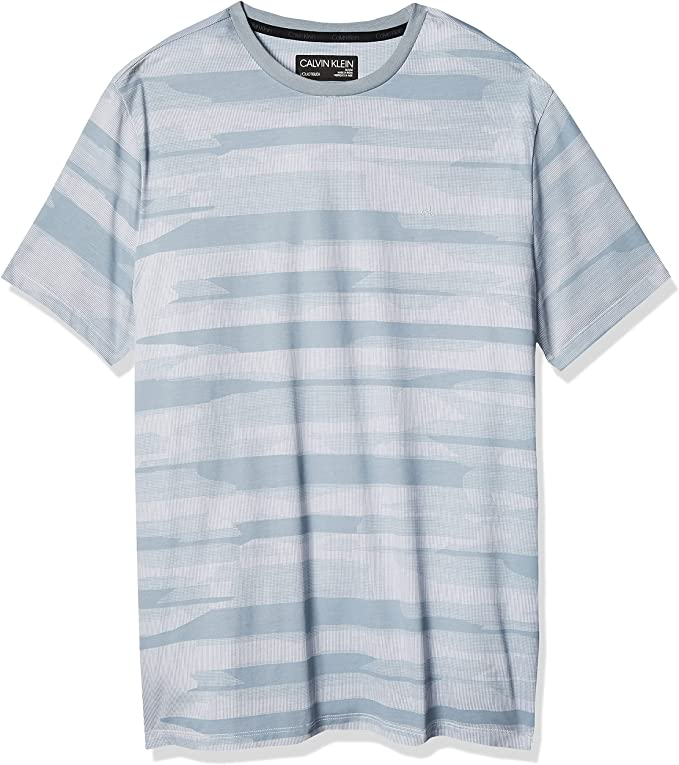

0


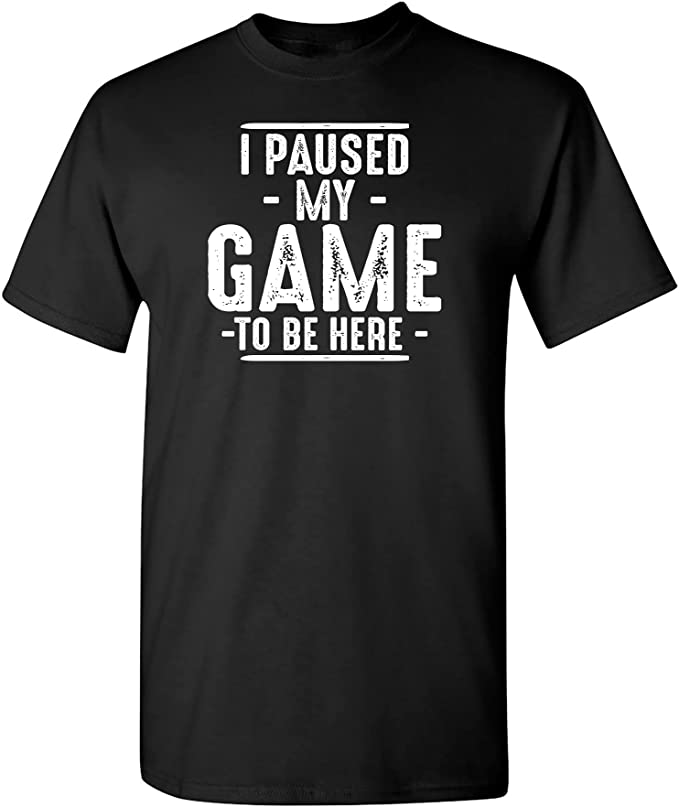

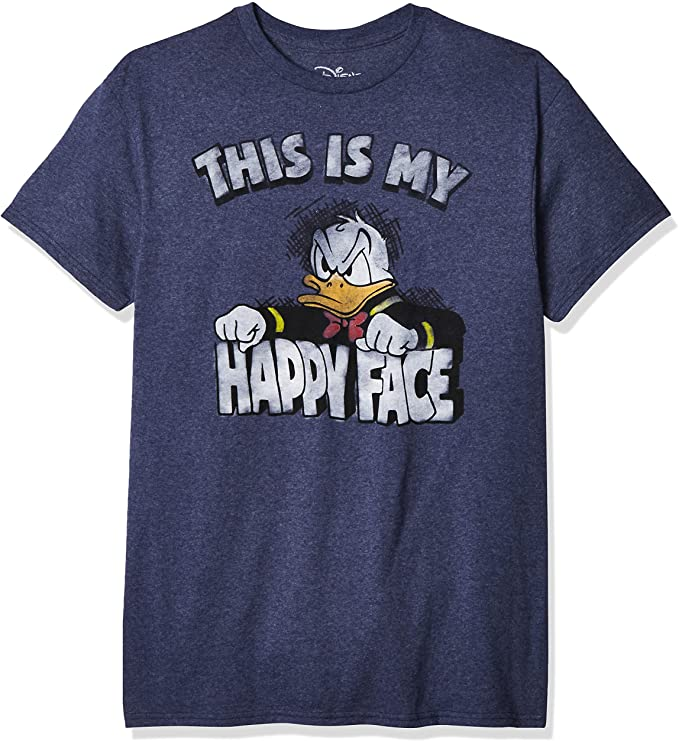

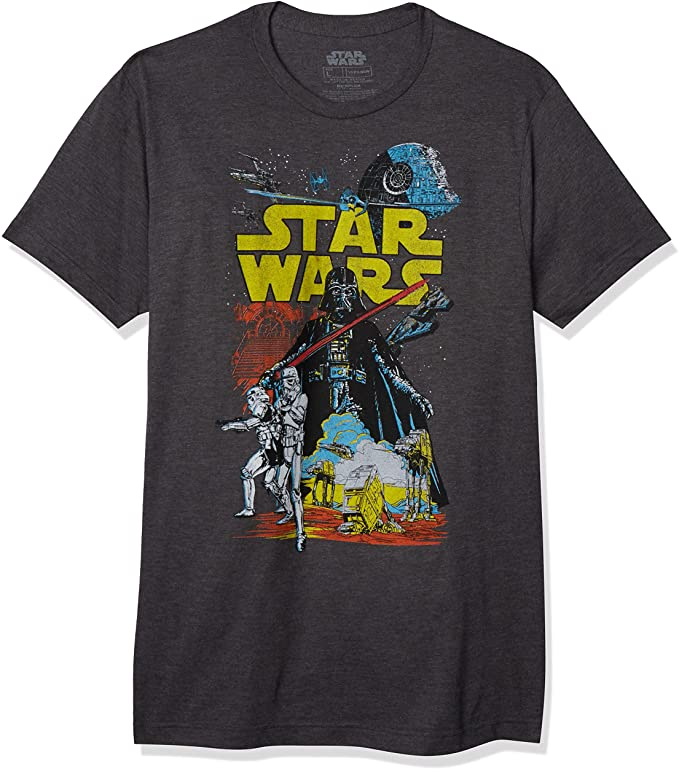

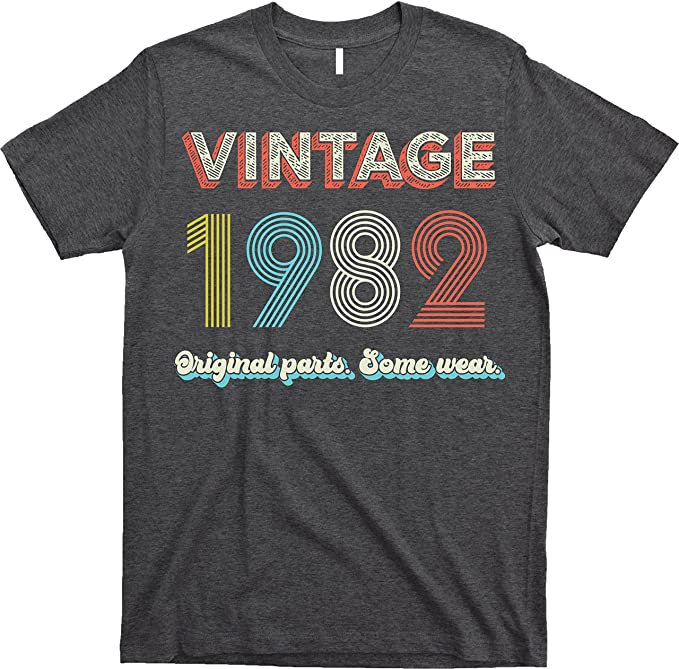

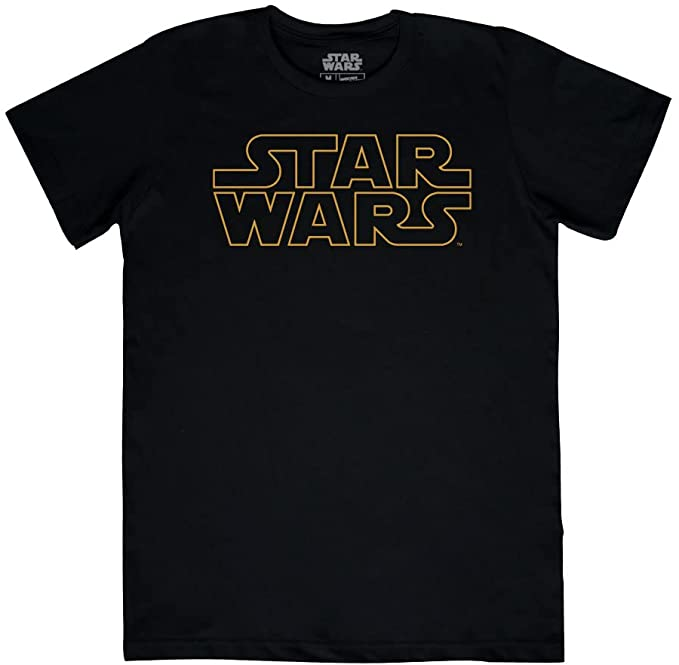

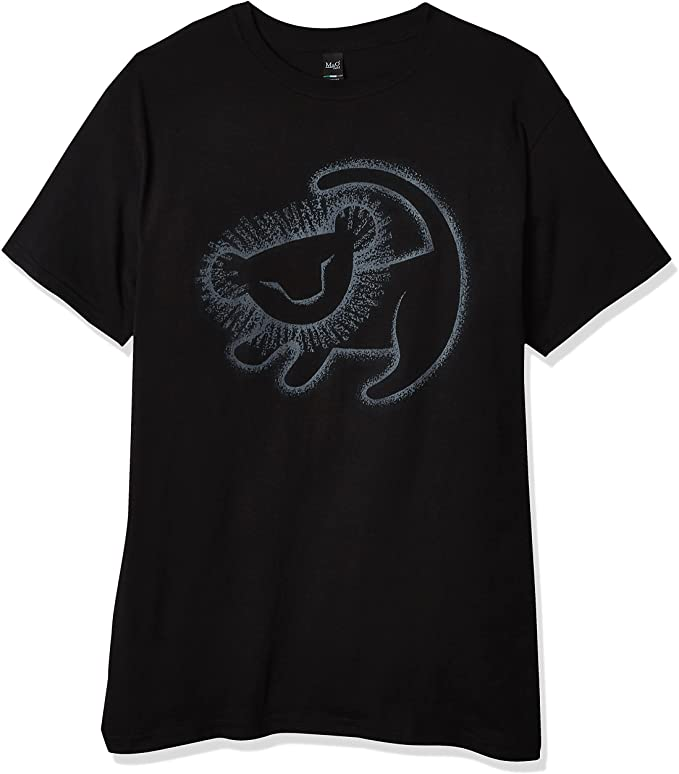

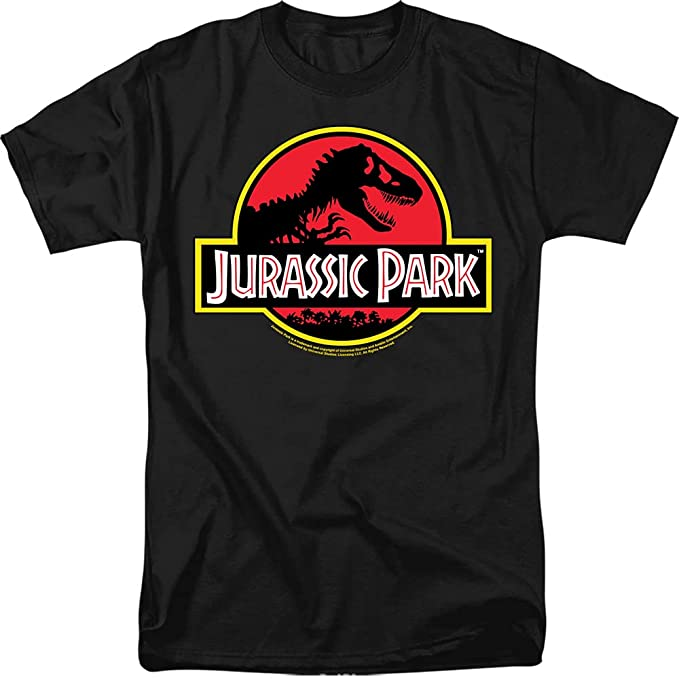

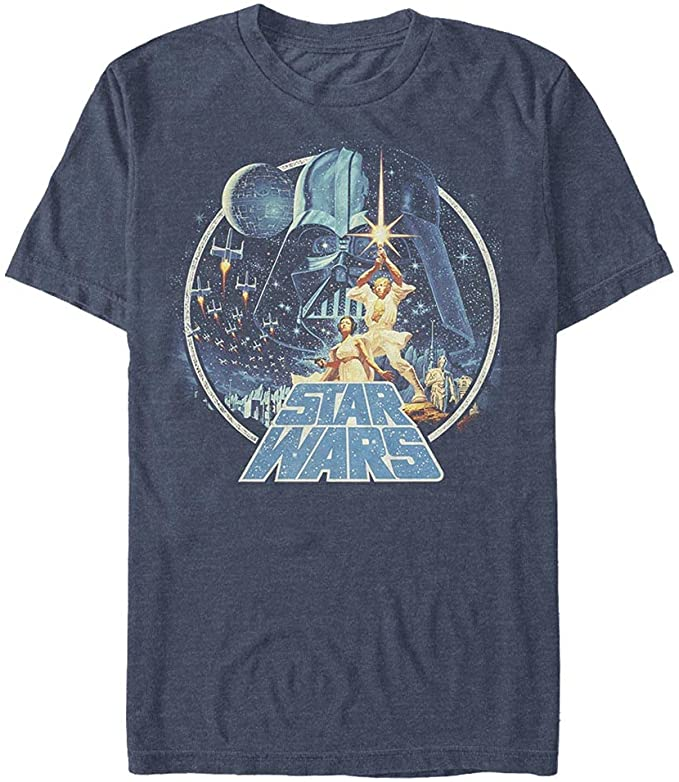

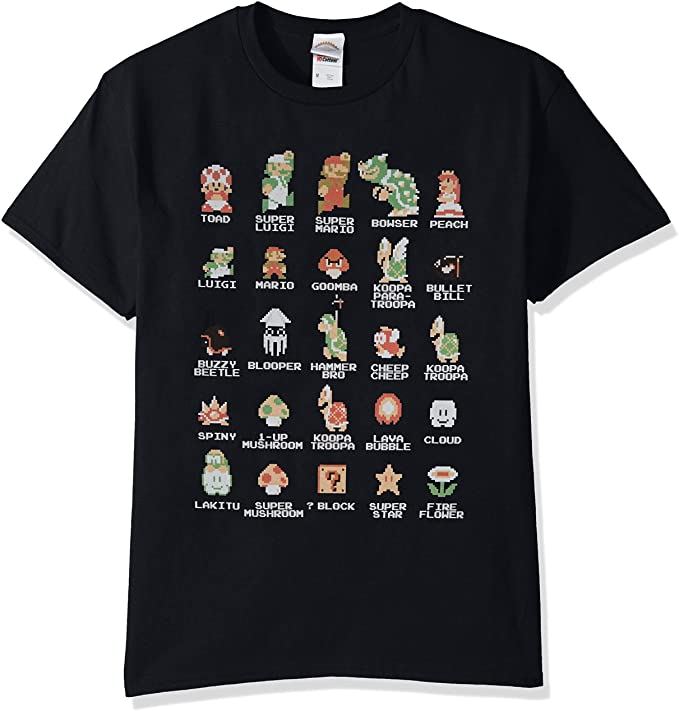

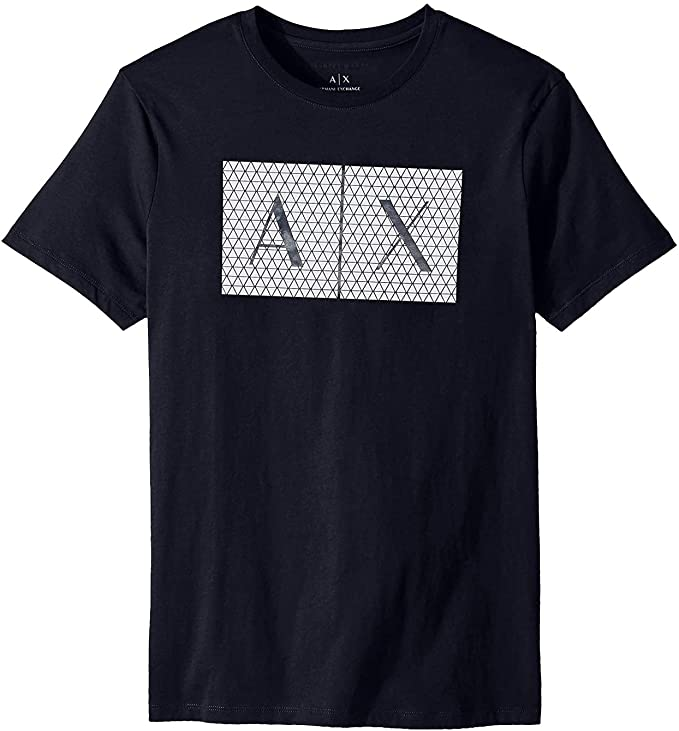

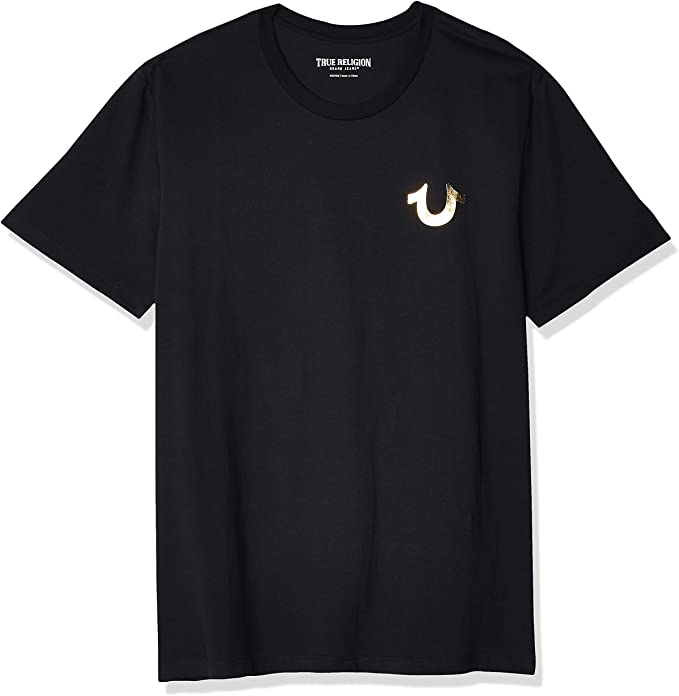

2


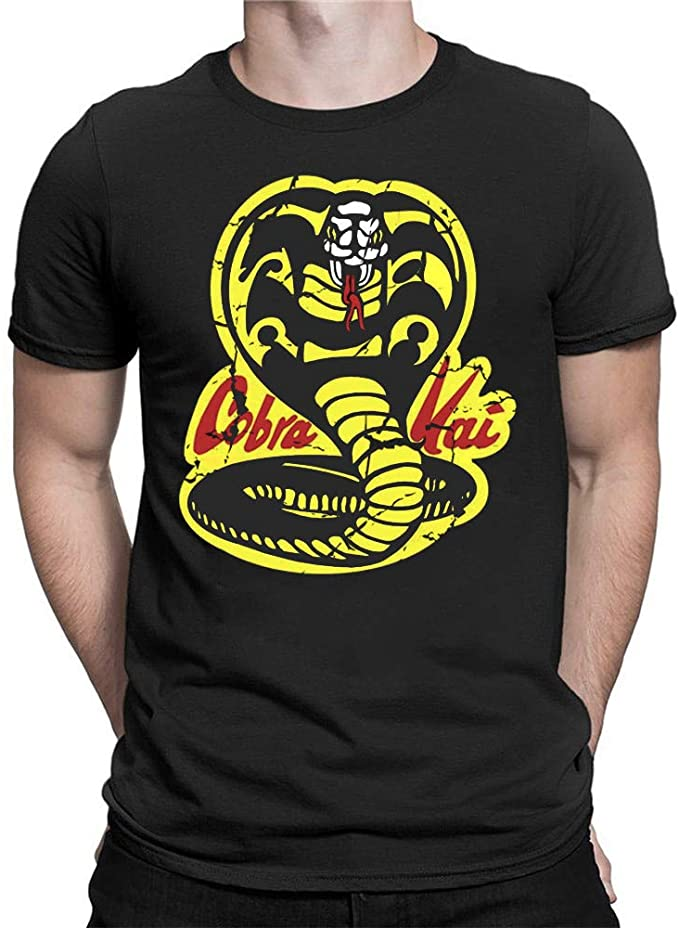

In [157]:
from IPython.display import Image, display

listOfImageNames = []

for group in groups:
    print(group)
    for img in groups[group]:
        fullpathimg = f"/Users/hsilva/Documents/Code/pocketcloset/Backend/tmp/PlWxnM6UyBOU4SyXR2yCF37VNyr2/{img}"
        display(Image(filename=fullpathimg))

   